Libraries Dependices:
1. numpy
2. pandas
3. matplotlib --> pyplot
4. seaborn
5. sklearn --> model_selection --> train_test_split
6. sklearn --> ensemble --> RandomForestClassifier
7. sklearn --> metrics --> accuracy_score, confusion_matrixs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

[Data](https://https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [2]:
# loading data into pandas DataFrame
wine_data = pd.read_csv('/content/winequality-red.csv')


In [3]:
# first five rows of the wine datasets
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# last five rows of the dataset
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# now checking the shape of the dataset
print('Wine Data shape: ', wine_data.shape)

Wine Data shape:  (1599, 12)


In [6]:
# stastical measure of the data 
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# here the target is quality columns, which values from follwoing range 
wine_data.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

In [8]:
# checking for the null values of the datasets
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The wine dataset doesn't have any null values. 

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


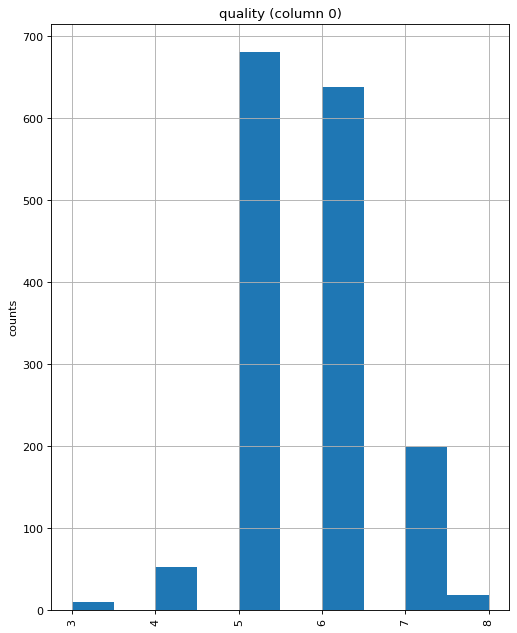

In [10]:
plotPerColumnDistribution(wine_data,10,5)

In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


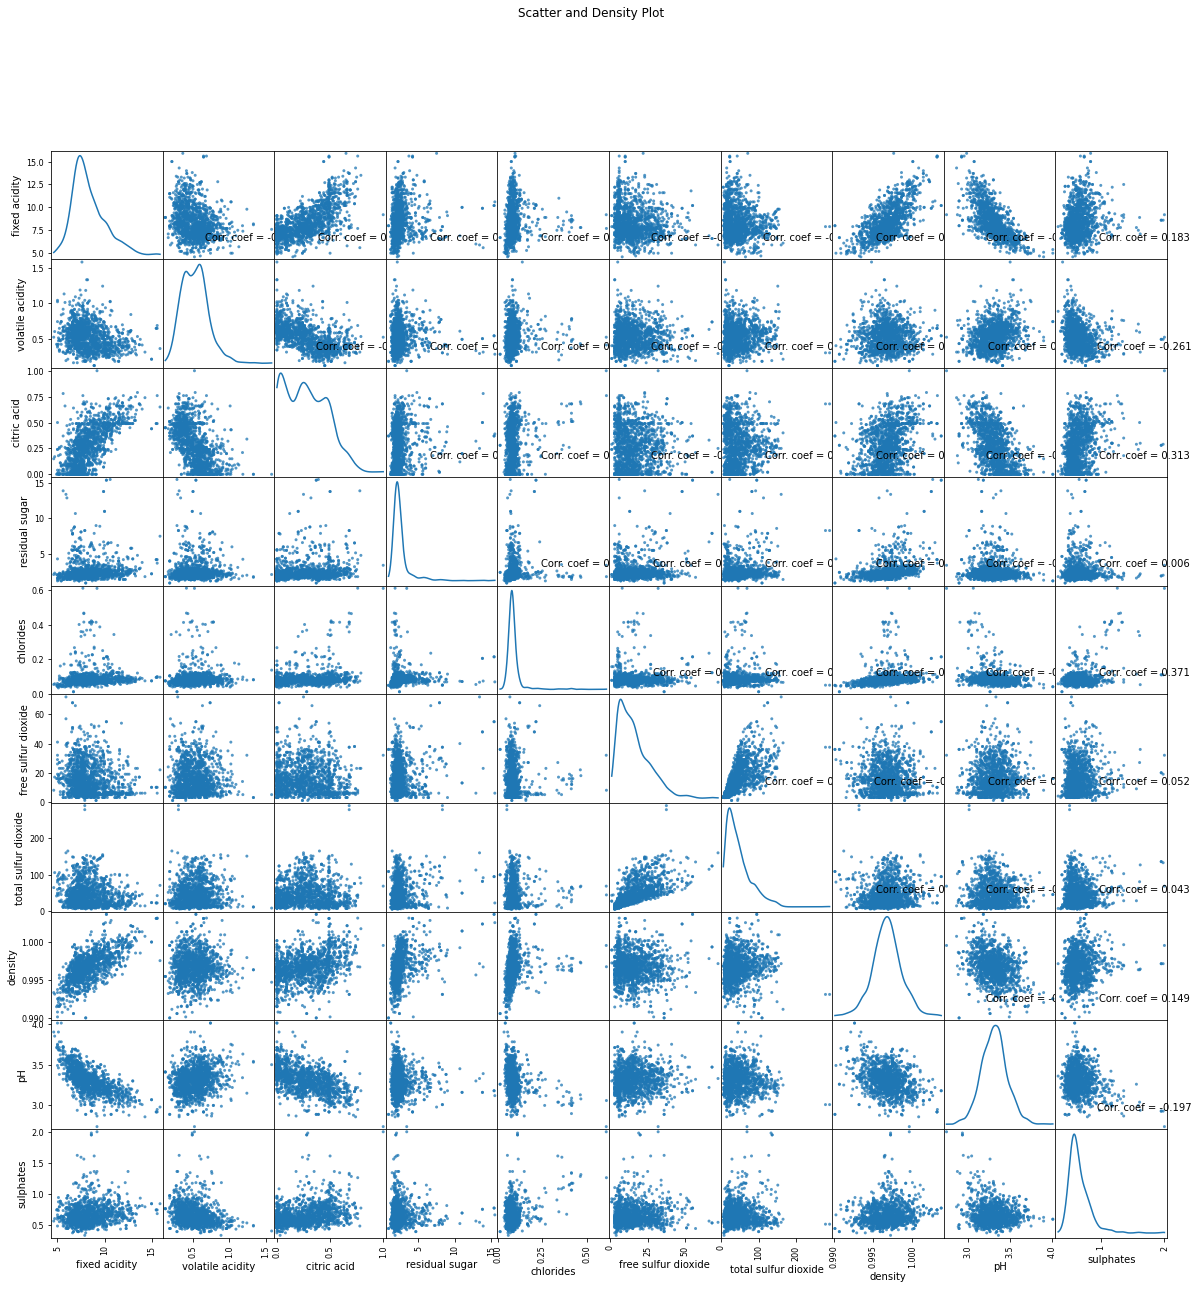

In [12]:
plotScatterMatrix(wine_data, 20, 10)

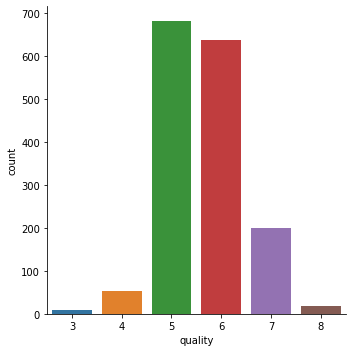

In [13]:
from numpy.ma.core import count
# data visulazition
sns.catplot(x = 'quality', data = wine_data, kind ='count')

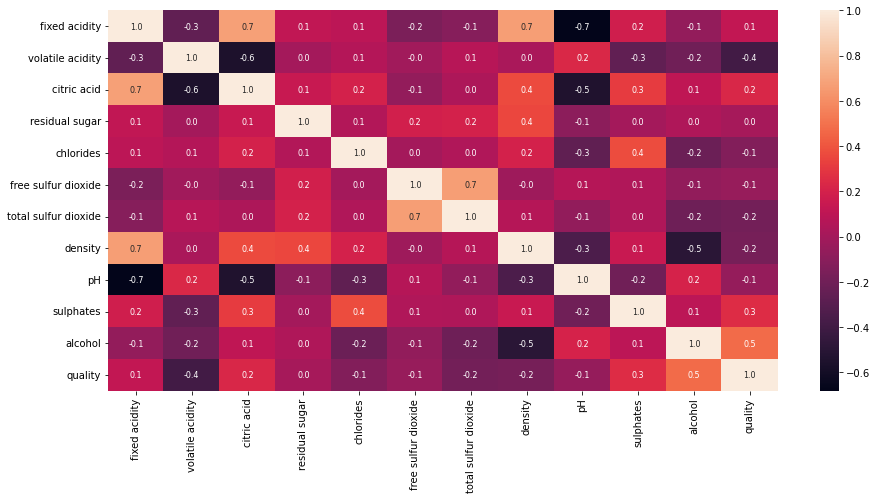

In [14]:
# finding feautes which are depends of target value (qaulity) of wine data
correlation = wine_data.corr()
# ploting the heatmap for understanding the dataset
plt.figure(figsize = (15,7))
sns.heatmap(correlation,cbar =True,fmt = '0.01f',annot = True, annot_kws = {'size':8 })



The above heartmap shows the correlation amongs featuers and target values. There are mainly type of corealtion:
1. postive correlation : if first quantity increase second quantity is also increases.
2. negative correlation : if the first quantity increases and second qauntity is decresase and vice versa.

**If correlation is zero, it's mean there is no correlation between quantities (doesn't depends each other)**

In above dataset all the attributes are correlated.

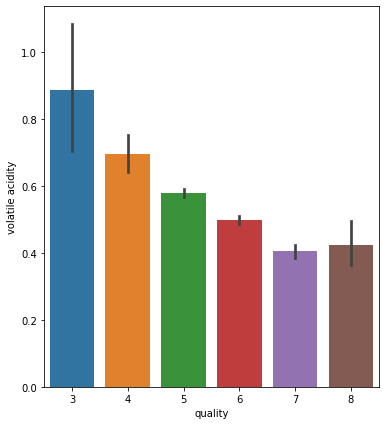

In [15]:
# now ploting bar plot for the better understanding about the dataset
plt.figure(figsize=(6,7))
sns.barplot(x = 'quality', y ='volatile acidity', data = wine_data)

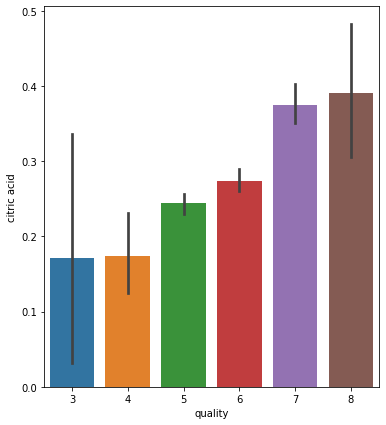

In [16]:
# lets compare other values also
plt.figure(figsize=(6,7))
sns.barplot(x = 'quality', y ='citric acid', data = wine_data)

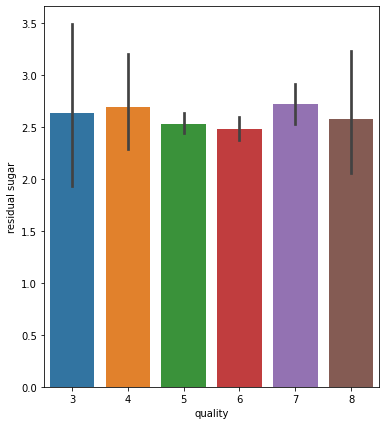

In [17]:
plt.figure(figsize=(6,7))
sns.barplot(x = 'quality', y ='residual sugar', data = wine_data)

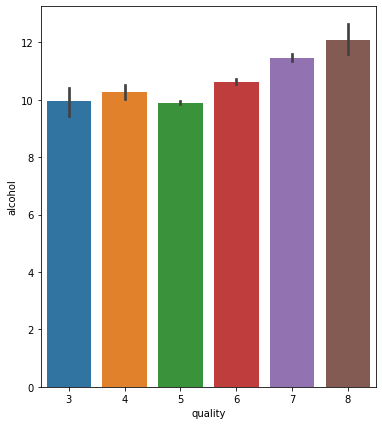

In [18]:
plt.figure(figsize=(6,7))
sns.barplot(x = 'quality', y ='alcohol', data = wine_data)

Data Preprocessing


In [19]:
X = wine_data.drop('quality', axis = 1)
Y = wine_data.quality

In [20]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [21]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [22]:
print("Features shape: ",X.shape)
print('Target shape :', Y.shape)

Features shape:  (1599, 11)
Target shape : (1599,)


Splitng into train test split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2,stratify=Y ,random_state= 2)

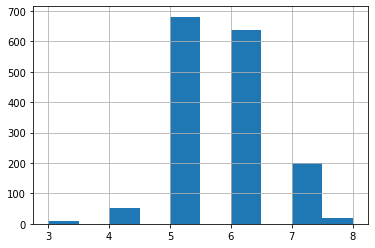

In [24]:
# plt.figure(figsize=(10,10))
Y.hist()

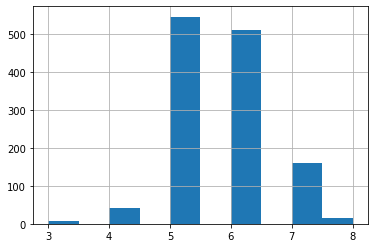

In [25]:
Y_train.hist()

In [26]:
# shape of the orginal, train and test dataset
print('Orginal data shape: ',X.shape)
print('Train data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Orginal data shape:  (1599, 11)
Train data shape:  (1279, 11)
Test data shape:  (320, 11)


In [27]:
# loading model
rand_clf = RandomForestClassifier()

In [28]:
# fitting model
rand_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
# prediction on train data
X_train_prediction = rand_clf.predict(X_train)

In [30]:
X_train_prediction

array([6, 5, 5, ..., 5, 7, 7])

In [31]:
# model evalution of the trai data
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)
X_train_confusion = confusion_matrix(X_train_prediction,Y_train)
print('X_train accuracy: ', X_train_accuracy * 100, '%')
print('X_train confusion matrix: ', X_train_confusion)

X_train accuracy:  100.0 %
X_train confusion matrix:  [[  8   0   0   0   0   0]
 [  0  42   0   0   0   0]
 [  0   0 545   0   0   0]
 [  0   0   0 510   0   0]
 [  0   0   0   0 159   0]
 [  0   0   0   0   0  15]]


In [32]:
# model evaluton on the test data
X_test_prediction = rand_clf.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)
X_test_confusion = confusion_matrix(X_test_prediction,Y_test)
print('X_train accuracy: ', X_test_accuracy * 100, '%')
print( X_test_confusion)

X_train accuracy:  66.875 %
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   6 110  40   2   0]
 [  0   5  25  84  17   2]
 [  0   0   1   4  20   1]
 [  0   0   0   0   1   0]]


Here wine quality on test data gives us only 68.5% accuray, which has multiclass scale from 3 to 8 (3,4,5,6,7,8). Where 3 stands for very bad quality wine and 8 stands for very best quality of wine. We can there is slightly difference on amongs the numbers.

In [33]:
# saving our model weights
import joblib
joblib.dump(rand_clf,'wine_qaulity_RandomForest.sav')

['wine_qaulity_RandomForest.sav']